In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes
import os

In [3]:
#pip install Lifetimes

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:


df = pd.read_csv("Online_Retail.csv")

In [9]:
list(df.columns)


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [11]:
df.shape

(541909, 8)

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
df[df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom


In [21]:
135080/df.shape[0] # 0.2492  

0.249266943342886

In [23]:
df['CustomerID'].nunique()

4372

In [25]:
#len(set(df['CustomerID'])) # slower

len(df[df.Quantity<0])

10624

In [27]:
dfnew = df[(df.Quantity>0) & (df.CustomerID.isnull() == False)]

In [40]:
dfnew.shape


(397924, 9)

In [42]:
dfnew['amt'] = dfnew['Quantity'] * dfnew['UnitPrice']

In [44]:
dfnew['InvoiceDate'] = pd.to_datetime(dfnew['InvoiceDate'], format="%d-%m-%Y %H:%M").dt.date


In [46]:
dfnew.describe()

,Quantity,UnitPrice,CustomerID,amt
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [48]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [50]:
modeldata = summary_data_from_transaction_data(dfnew, 'CustomerID', 'InvoiceDate', monetary_value_col='amt', observation_period_end='2011-12-9')
modeldata.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


<Axes: ylabel='Frequency'>

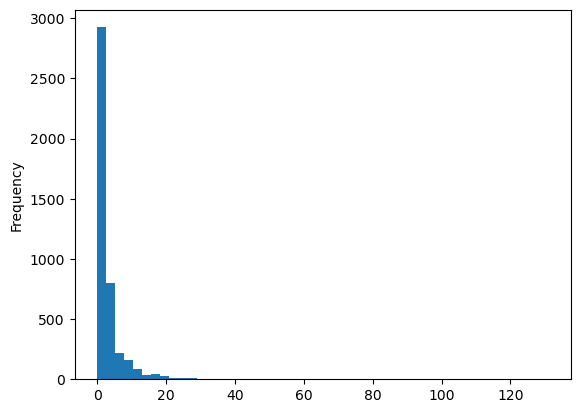

In [52]:
modeldata['frequency'].plot(kind='hist', bins=50)

In [54]:
print(modeldata['frequency'].describe())

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64


In [56]:
print(sum(modeldata['frequency'] == 0)/float(len(modeldata)))

0.3569946992394561


In [58]:

dfnew[dfnew.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amt
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.6


In [60]:
from lifetimes import BetaGeoFitter
# similar API to scikit-learn and lifelines.


In [62]:
bgf = BetaGeoFitter(penalizer_coef=0.0)

In [64]:
bgf.fit(modeldata['frequency'], modeldata['recency'], modeldata['T'])

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>

In [66]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


In [68]:
# create frequency recency matrix
from lifetimes.plotting import plot_frequency_recency_matrix

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

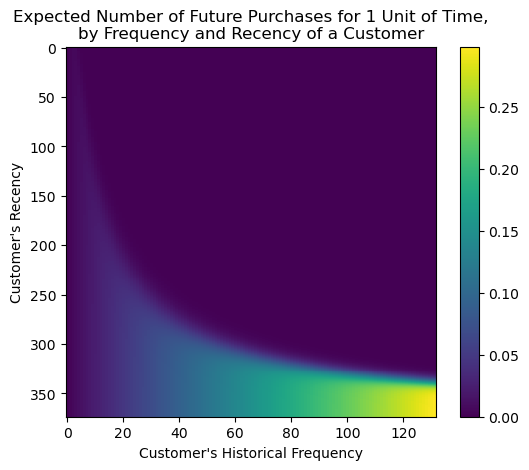

In [70]:
plot_frequency_recency_matrix(bgf)

In [71]:
from lifetimes.plotting import plot_probability_alive_matrix

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

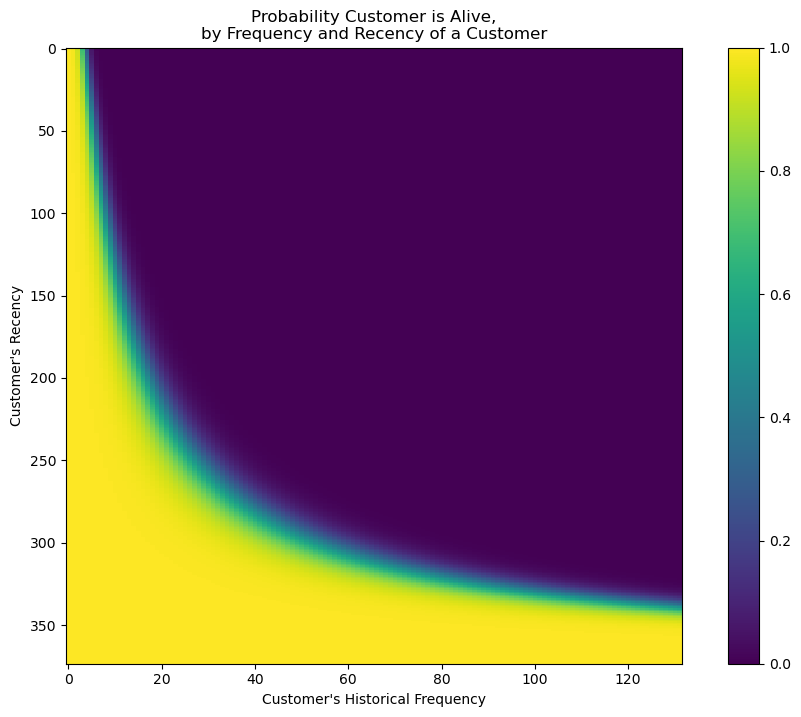

In [74]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)


In [76]:
t = 1
modeldata['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, modeldata['frequency'], modeldata['recency'], modeldata['T'])
modeldata.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,0.201005
15311.0,89.0,373.0,373.0,677.729438,0.203269
17841.0,111.0,372.0,373.0,364.452162,0.253053
12748.0,113.0,373.0,373.0,298.360885,0.257581
14911.0,131.0,372.0,373.0,1093.661679,0.298312


In [78]:
modeldata.sort_values(by='predicted_purchases').head(895)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
18074.0,0.0,0.0,373.0,0.00,0.001870
16048.0,0.0,0.0,373.0,0.00,0.001870
16274.0,0.0,0.0,373.0,0.00,0.001870
14237.0,0.0,0.0,373.0,0.00,0.001870
14142.0,0.0,0.0,373.0,0.00,0.001870
...,...,...,...,...,...
17194.0,1.0,87.0,360.0,10.00,0.004245
14544.0,1.0,337.0,361.0,902.53,0.004246
17371.0,1.0,344.0,361.0,326.26,0.004246


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

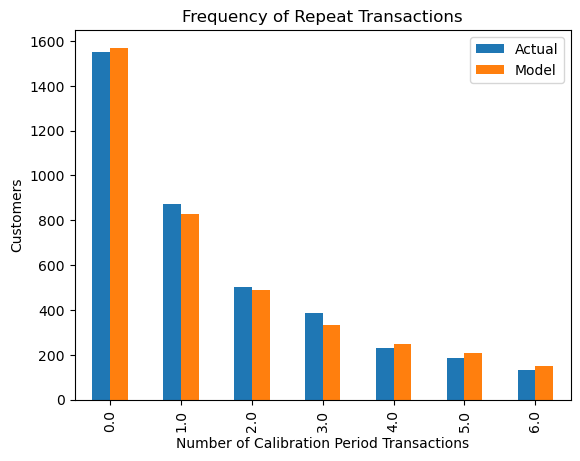

In [80]:

from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [90]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")



In [92]:
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                                   calibration_period_end='2011-06-08',
                                                   observation_period_end='2011-12-9')
print(summary_cal_holdout.head())


            frequency_cal  recency_cal  T_cal  frequency_holdout  duration_holdout
CustomerID                                                                        
12346.0               0.0          0.0  141.0                0.0             184.0
12347.0               2.0        121.0  183.0                4.0             184.0
12348.0               2.0        110.0  174.0                1.0             184.0
12350.0               0.0          0.0  126.0                0.0             184.0
12352.0               3.0         34.0  112.0                3.0             184.0


C:\Users\ashis\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

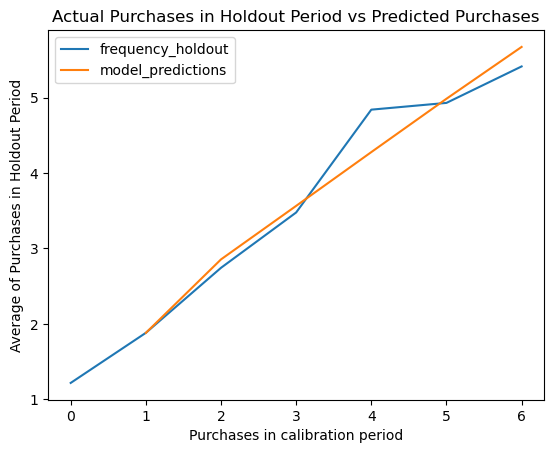

In [93]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [94]:
t = 10
individual = modeldata.loc[12380]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.15861476348707299

In [95]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

In [100]:

fig = plt.figure(figsize=(12,8))
id = 14620  # id = 18074  id = 14606
days_since_birth = 365

<Figure size 1200x800 with 0 Axes>

In [102]:
sp_trans = df.loc[df['CustomerID'] == id]


In [104]:
sp_trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom
105336,545220,48194,DOORMAT HEARTS,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01 08:30:00,1.65,14620.0,United Kingdom
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01 08:30:00,4.95,14620.0,United Kingdom
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01 08:30:00,3.75,14620.0,United Kingdom
105340,545220,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-03-01 08:30:00,4.95,14620.0,United Kingdom
105341,545220,17091J,VANILLA INCENSE IN TIN,6,2011-03-01 08:30:00,1.25,14620.0,United Kingdom
105342,545220,84678,CLASSICAL ROSE SMALL VASE,6,2011-03-01 08:30:00,2.55,14620.0,United Kingdom
105343,545220,21700,BIG DOUGHNUT FRIDGE MAGNETS,12,2011-03-01 08:30:00,0.85,14620.0,United Kingdom
105344,545220,22191,IVORY DINER WALL CLOCK,2,2011-03-01 08:30:00,8.50,14620.0,United Kingdom


In [112]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")  # Ensure datetime format
df['days_since_birth'] = (df['InvoiceDate'] - df['InvoiceDate'].min()).dt.days


In [120]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
print(df['InvoiceDate'].head())


0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [122]:
df['days_since_birth'] = (df['InvoiceDate'] - df['InvoiceDate'].min()).dt.days
print(df['days_since_birth'].head())


0    0
1    0
2    0
3    0
4    0
Name: days_since_birth, dtype: int64


In [124]:
print(df['InvoiceDate'].min())


2010-12-01 08:26:00


In [126]:
reference_date = pd.to_datetime('2023-12-12')  # Use the current date or any reference date
df['days_since_birth'] = (df['InvoiceDate'] - reference_date).dt.days
print(df['days_since_birth'].head())


0   -4759
1   -4759
2   -4759
3   -4759
4   -4759
Name: days_since_birth, dtype: int64


In [128]:
df['days_since_birth'] = df['days_since_birth'].astype(int)
print(df['days_since_birth'].head())


0   -4759
1   -4759
2   -4759
3   -4759
4   -4759
Name: days_since_birth, dtype: int32


In [144]:
df['days_since_birth'] = df['days_since_birth'].astype('int64')
print(df['days_since_birth'].dtype)


int64


In [132]:
df['days_since_birth'] = (df['InvoiceDate'] - reference_date).dt.days
df['days_since_birth'] = df['days_since_birth'].astype(int)  # Ensure it's integer type
print(df['days_since_birth'].dtype)  # Should show int64


int32


In [152]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
print(df['InvoiceDate'].head())  # Check if it is correctly converted to datetime


0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [154]:
reference_date = pd.to_datetime('2011-06-08')
df['days_since_birth'] = (df['InvoiceDate'] - reference_date).dt.days
df['days_since_birth'] = df['days_since_birth'].astype(int)
print(df['days_since_birth'].head())  # Check the output


0   -189
1   -189
2   -189
3   -189
4   -189
Name: days_since_birth, dtype: int32


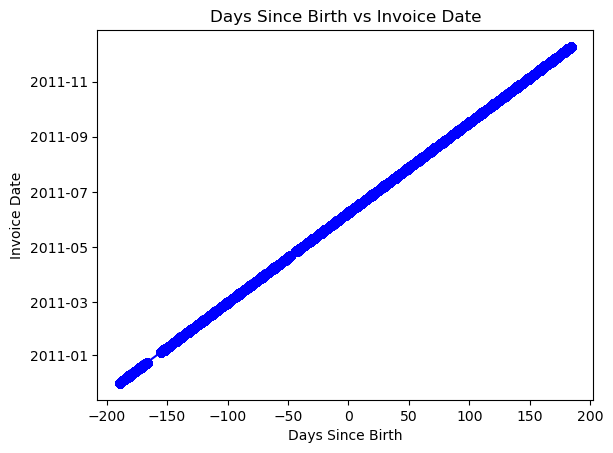

In [158]:
import matplotlib.pyplot as plt

plt.plot(df['days_since_birth'], df['InvoiceDate'], marker='o', linestyle='-', color='b')
plt.xlabel('Days Since Birth')
plt.ylabel('Invoice Date')
plt.title('Days Since Birth vs Invoice Date')
plt.show()



In [136]:
# We are only estimating the customers who had at least one repeat purchase with us
returning_customers_summary = modeldata[modeldata['frequency']>0]

In [138]:
print(returning_customers_summary.head())

            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667             0.015656
12348.0           3.0    283.0  358.0      301.480000             0.008956
12352.0           6.0    260.0  296.0      368.256667             0.018697
12356.0           2.0    303.0  325.0      269.905000             0.007172
12358.0           1.0    149.0  150.0      683.200000             0.008340


In [140]:
print(len(returning_customers_summary))

2790


In [160]:
modeldata.shape

(4339, 5)

In [162]:
from lifetimes import GammaGammaFitter

In [164]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

print(ggf)


<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [166]:
print(ggf.conditional_expected_average_profit(modeldata['frequency'], \
    modeldata['monetary_value']).head(10))

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64


In [168]:
import datetime

In [170]:
list(dfnew.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'amt']

In [172]:
dfnew_train = dfnew[dfnew.InvoiceDate < datetime.date(2011, 11, 9)]
dfnew_test = dfnew[dfnew.InvoiceDate >= datetime.date(2011, 11, 9)]

In [174]:
maxdate = dfnew_train.InvoiceDate.max()
maxdate

datetime.date(2011, 11, 8)

In [176]:
mindate = dfnew_train.InvoiceDate.min()
mindate 

datetime.date(2010, 12, 1)

In [178]:

dfnew_train['duration'] =  (maxdate - dfnew_train.InvoiceDate)/np.timedelta64(1, 'D')

In [179]:
# get time duration between the last transaction to now
dfsum1 = dfnew_train.groupby(['CustomerID'])['duration'].min().reset_index()
dfsum1.head()

,CustomerID,duration
0,12346.0,294.0
1,12347.0,8.0
2,12348.0,44.0
3,12350.0,279.0
4,12352.0,5.0


In [180]:
dfsum1.rename(columns = {'duration':'latetime'}, inplace = True)

In [184]:
dfsum1.head()

,CustomerID,latetime
0,12346.0,294.0
1,12347.0,8.0
2,12348.0,44.0
3,12350.0,279.0
4,12352.0,5.0


In [186]:
# get time duration between the first transaction to now
dfsum2 = dfnew_train.groupby(['CustomerID'])['duration'].max().reset_index()
dfsum2.rename(columns = {'duration':'earlytime'}, inplace = True)

In [188]:
# get transaction frequency (whole history)
dfnew_train['freq'] =1 
dfsum3 = dfnew_train.groupby(['CustomerID'])['freq'].sum().reset_index()

In [190]:
# get transaction frequency (recent 3 months history)
dfnew_train['freq_3m'] =1 
dfsum4 = dfnew_train[dfnew_train.duration<91].groupby(['CustomerID'])['freq_3m'].sum().reset_index()

dfsum = pd.merge(dfsum1, dfsum2, on=['CustomerID'], how='outer')
dfsum = pd.merge(dfsum, dfsum3, on=['CustomerID'], how='outer')
dfsum = pd.merge(dfsum, dfsum4, on=['CustomerID'], how='outer')

In [192]:
dfnew.InvoiceDate.max()
dfnew.InvoiceDate.min()

datetime.date(2010, 12, 1)

In [194]:
A = dfnew[dfnew.InvoiceDate>datetime.date(2011, 11, 9)]
A.shape

(64285, 9)

In [196]:
Z = pd.DataFrame(A.CustomerID.value_counts()).reset_index()
list(Z.columns)

['CustomerID', 'count']

In [198]:
Z.columns = ['CustomerID','buytime']
Z = Z.sort_values(['buytime'], ascending = False)
Z.head(20)


,CustomerID,buytime
0,14096.0,2423
1,12748.0,1651
2,17841.0,1459
3,14911.0,1090
4,16549.0,470
5,13521.0,436
6,14606.0,336
7,14456.0,325
8,16360.0,290
9,18283.0,269


In [200]:
len(Z)
len(set(dfnew.CustomerID))

4339

In [202]:
allcus = pd.DataFrame(set(dfnew.CustomerID), columns = ['CustomerID'])

In [204]:
allcus = pd.merge(allcus, Z, on=['CustomerID'], how='left').sort_values(['buytime'], ascending = False)
allcus = allcus.fillna(0)

In [206]:
allcus['buytime'] = allcus['buytime']/allcus['buytime'].max()


In [208]:
allcus['v1'] = allcus['buytime']*0.78 + np.random.normal(0, 0.11, len(allcus))

allcus['v2'] = allcus['buytime']*allcus['buytime']*(-0.195) + 0.11*allcus['buytime']

In [210]:
allcus.corr()

,CustomerID,buytime,v1,v2
CustomerID,1.000000,0.002481,-0.003815,0.023910
buytime,0.002481,1.000000,0.157036,-0.138668
v1,-0.003815,0.157036,1.000000,-0.038438
v2,0.023910,-0.138668,-0.038438,1.000000


In [212]:

allcus['v1'] = (allcus['v1'] - allcus['v1'].min())/(allcus['v1'].max() - allcus['v1'].min())

allcus['v2'] = (allcus['v2'] - allcus['v2'].min())/(allcus['v2'].max() - allcus['v2'].min())

allcus['score'] = round(allcus['v2']*100000)
allcus.score.max()

100000.0

In [214]:
allcus['discount'] = round(allcus['v1']*12.6)

allcus['r'] = np.random.randint(100,size=len(allcus))

In [216]:

def def2(D):
    if D['r']<13:
        x = 0
    else:
        x = D['discount']
    
    return x

In [218]:
allcus['discount'] = allcus.apply(def2, axis = 1)

In [220]:

v = ['CustomerID', 'score', 'discount']
allcus = allcus[v]


In [222]:

allcus = allcus.sort_values(['score'])

In [224]:

allcus.score.std()
allcus.corr()

,CustomerID,score,discount
CustomerID,1.000000,0.023909,0.002426
score,0.023909,1.000000,-0.036882
discount,0.002426,-0.036882,1.000000


In [226]:

allcus.to_csv('oth.csv', index = False)

In [228]:
#get other data source
other_data = pd.read_csv('oth.csv')
list(other_data.columns)
dfsum = pd.merge(dfsum, other_data, on=['CustomerID'], how='left')

In [230]:
dfsum 

,CustomerID,latetime,earlytime,freq,freq_3m,score,discount
0,12346.0,294.0,294.0,1,NaN,85858.0,6.0
1,12347.0,8.0,336.0,171,47.0,86359.0,4.0
2,12348.0,44.0,327.0,31,3.0,85858.0,4.0
3,12350.0,279.0,279.0,17,NaN,85858.0,0.0
4,12352.0,5.0,265.0,85,47.0,85858.0,5.0
...,...,...,...,...,...,...,...
4062,18280.0,246.0,246.0,10,NaN,85858.0,5.0
4063,18281.0,149.0,149.0,7,NaN,85858.0,0.0
4064,18282.0,95.0,95.0,7,NaN,86087.0,0.0
4065,18283.0,12.0,306.0,487,87.0,95766.0,4.0


In [232]:

# get target 
dfnew_test['target'] = 1
dfsum_target = dfnew_test.groupby(['CustomerID'])['target'].sum().reset_index()

In [234]:
dfsum = pd.merge(dfsum, dfsum_target, on=['CustomerID'], how='left')
dfsum  = dfsum.fillna(0).sort_values(['target'], ascending = False)

In [236]:
# check all features in the modeling data
list(dfsum.columns)

['CustomerID',
 'latetime',
 'earlytime',
 'freq',
 'freq_3m',
 'score',
 'discount',
 'target']

In [238]:
dfsum.head(10)

,CustomerID,latetime,earlytime,freq,freq_3m,score,discount,target
1216,14096.0,8.0,70.0,2688,2688.0,0.0,13.0,2423.0
300,12748.0,0.0,342.0,2945,1070.0,70118.0,10.0,1651.0
3766,17841.0,0.0,342.0,6309,2548.0,81346.0,9.0,1538.0
1770,14911.0,1.0,342.0,4566,2066.0,95982.0,7.0,1111.0
2896,16549.0,0.0,303.0,511,368.0,100000.0,4.0,470.0
1572,14606.0,1.0,342.0,2364,531.0,97479.0,0.0,336.0
1463,14456.0,9.0,111.0,645,404.0,97218.0,4.0,325.0
2772,16360.0,7.0,57.0,372,372.0,96335.0,6.0,290.0
2052,15311.0,4.0,342.0,2104,535.0,95428.0,6.0,275.0
4065,18283.0,12.0,306.0,487,87.0,95766.0,4.0,269.0


In [240]:
import xgboost
from sklearn.model_selection import train_test_split

In [241]:
xgb_model = xgboost.XGBRegressor(n_estimators=2200, objective='reg:linear', max_depth = 5)

In [244]:
predictors = ['latetime','earlytime', 'freq','freq_3m', 'score','discount']
X = dfsum[predictors]
y = dfsum.target

In [246]:
x_trains, x_valids, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=12)

In [248]:
xgb_model.fit(x_trains, y_train)

C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:35:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2200, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [249]:
preds = xgb_model.predict(x_valids)

In [250]:
errs= np.abs(preds - y_valid)**2

In [251]:
mse = np.sqrt(errs.mean())

In [256]:
mse

13.027529495204899

In [258]:

from xgboost import plot_importance
from matplotlib import pyplot

In [260]:

# for XGBRegressor, we use the following ways
xgb_model.get_booster().get_score(importance_type="gain")

{'latetime': 3.2026944160461426,
 'earlytime': 2.48828387260437,
 'freq': 4.905092716217041,
 'freq_3m': 5858.90234375,
 'score': 1424.8338623046875,
 'discount': 3.7862563133239746}

In [262]:
xgb_model.get_booster().get_score(importance_type="weight")


{'latetime': 7495.0,
 'earlytime': 6264.0,
 'freq': 7143.0,
 'freq_3m': 3346.0,
 'score': 3359.0,
 'discount': 2428.0}

In [264]:
'''
importance_type:
    
‘weight’ - the number of times a feature is used to split the data across all trees.
‘gain’ - the average gain across all splits the feature is used in.
‘cover’ - the average coverage across all splits the feature is used in. (yes/no proportion)
‘total_gain’ - the total gain across all splits the feature is used in.
‘total_cover’ - the total coverage across all splits the feature is used in.

'''

'\nimportance_type:\n    \n‘weight’ - the number of times a feature is used to split the data across all trees.\n‘gain’ - the average gain across all splits the feature is used in.\n‘cover’ - the average coverage across all splits the feature is used in. (yes/no proportion)\n‘total_gain’ - the total gain across all splits the feature is used in.\n‘total_cover’ - the total coverage across all splits the feature is used in.\n\n'

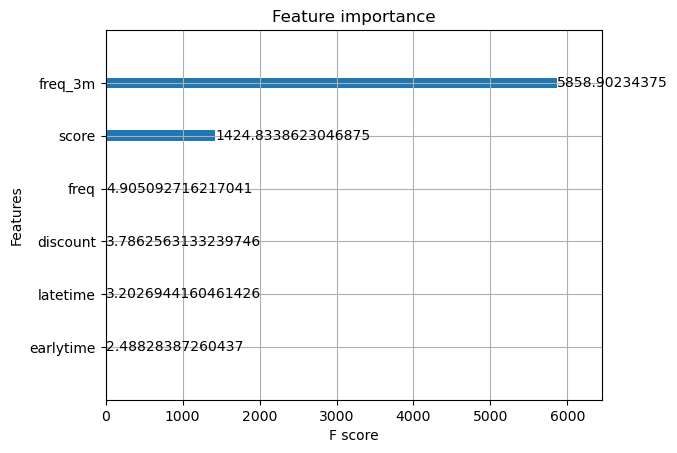

In [266]:
# plot feature importance
plot_importance(xgb_model, importance_type='gain')
pyplot.show()

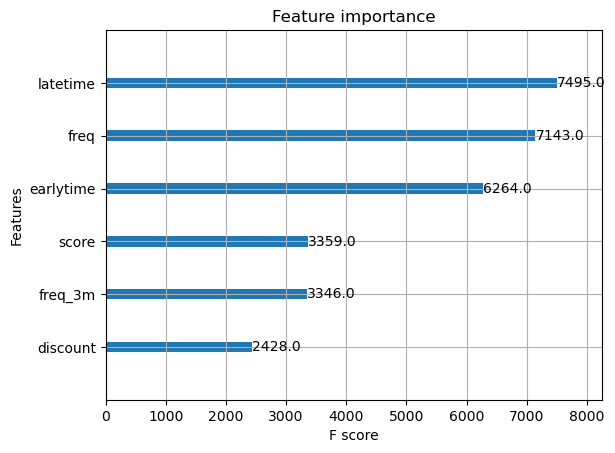

In [268]:

plot_importance(xgb_model, importance_type='weight') # default option is 'weight'
pyplot.show()

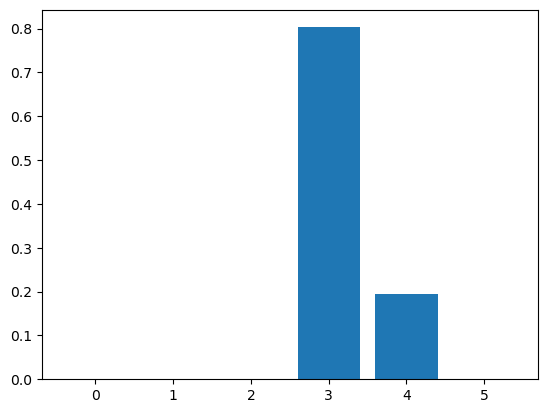

In [270]:
# we can also use feature_importances_, but it is the same as importance_type='gain'
imp = xgb_model.feature_importances_
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

In [272]:
#  we can list importance by dict, by 'gain'
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([x_trains.columns[index], xgb_model.feature_importances_[index]]) 

['freq_3m', 0.80279624]
['score', 0.19523303]
['freq', 0.0006721037]
['discount', 0.00051879894]
['latetime', 0.00043883835]
['earlytime', 0.00034094867]


In [274]:

important_var = [(x_trains.columns[index], xgb_model.feature_importances_[index]) for index in sorted_idx]

In [276]:
# check correlation of features with target
dfsum.corr()

,CustomerID,latetime,earlytime,freq,freq_3m,score,discount,target
CustomerID,1.000000,0.010700,0.008295,-0.000879,0.000297,0.017148,0.001777,-0.001660
latetime,0.010700,1.000000,0.320846,-0.213880,-0.274409,-0.106303,0.000915,-0.109399
earlytime,0.008295,0.320846,1.000000,0.214979,0.024627,0.097698,0.014684,0.071634
freq,-0.000879,-0.213880,0.214979,1.000000,0.878293,0.065750,0.067713,0.731558
freq_3m,0.000297,-0.274409,0.024627,0.878293,1.000000,-0.180902,0.086383,0.825482
score,0.017148,-0.106303,0.097698,0.065750,-0.180902,1.000000,-0.041318,-0.194449
discount,0.001777,0.000915,0.014684,0.067713,0.086383,-0.041318,1.000000,0.107191
target,-0.001660,-0.109399,0.071634,0.731558,0.825482,-0.194449,0.107191,1.000000


In [278]:
import lightgbm as lgb   

C:\Users\ashis\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 14.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [279]:
lgbparams = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',    
    'max_depth': 6, 
    'learning_rate': 0.02
}

In [280]:

predictors = ['latetime','earlytime', 'freq','freq_3m', 'score','discount']  

In [281]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=12)

In [286]:
x_trains, x_valids, y_train, y_valid = train_test_split(X1, y1, test_size=0.1, random_state=12)
x_train = x_trains[predictors]
x_valid = x_valids[predictors]

In [288]:
d_train = lgb.Dataset(x_train, label=y_train)
d_valid = lgb.Dataset(x_valid, label=y_valid)

In [290]:
# for monitoring the performance
watchlist = [d_valid]
n_estimators = 2200 # this para will be set in train()

In [300]:
model = lgb.train(lgbparams, d_train, num_boost_round=n_estimators, valid_sets=watchlist)




[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 2561, number of used features: 6
[LightGBM] [Warning] Provided parameters constra

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1017]	valid_0's l2: 277.005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1018]	valid_0's l2: 275.084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1019]	valid_0's l2: 276.185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1020]	valid_0's l2: 274.422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1021]	valid_0's l2: 275.351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1022]	valid_0's l2: 276.504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1023]	valid_0's l2: 274.557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1024]	valid_0's l2: 275.663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1025]	valid_0's l2: 273.916
[LightGBM] [Warning] No further splits with positive gain, best 

[1228]	valid_0's l2: 259.645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1229]	valid_0's l2: 258.427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1230]	valid_0's l2: 259.093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1231]	valid_0's l2: 257.304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1232]	valid_0's l2: 258.15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1233]	valid_0's l2: 259.012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1234]	valid_0's l2: 257.498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1235]	valid_0's l2: 258.353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1236]	valid_0's l2: 256.833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1237]	valid_0's l2: 257.721
[LightGBM] [Warning] No further spli

[1471]	valid_0's l2: 230.365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1472]	valid_0's l2: 230.957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1473]	valid_0's l2: 229.918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1474]	valid_0's l2: 230.507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1475]	valid_0's l2: 229.594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1476]	valid_0's l2: 230.199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1477]	valid_0's l2: 230.636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1478]	valid_0's l2: 229.608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1479]	valid_0's l2: 230.229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1480]	valid_0's l2: 229.068
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's l2: 210.939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1701]	valid_0's l2: 211.174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1702]	valid_0's l2: 211.515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1703]	valid_0's l2: 210.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1704]	valid_0's l2: 211.247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1705]	valid_0's l2: 210.487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1706]	valid_0's l2: 210.719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1707]	valid_0's l2: 211.123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1708]	valid_0's l2: 210.351
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1938]	valid_0's l2: 199.495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1939]	valid_0's l2: 199.841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1940]	valid_0's l2: 199.449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1941]	valid_0's l2: 199.896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1942]	valid_0's l2: 199.274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1943]	valid_0's l2: 199.506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1944]	valid_0's l2: 199.772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1945]	valid_0's l2: 199.145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1946]	valid_0's l2: 199.489
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2166]	valid_0's l2: 191.404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2167]	valid_0's l2: 191.235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2168]	valid_0's l2: 190.762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2169]	valid_0's l2: 190.967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2170]	valid_0's l2: 191.19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2171]	valid_0's l2: 191.019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2172]	valid_0's l2: 190.466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2173]	valid_0's l2: 190.775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2174]	valid_0's l2: 191.058
[LightGBM] [Warning] No further splits with positive gain, best g

In [302]:

preds = model.predict(X2)
errs= np.abs(preds - y2)**2
mse = np.sqrt(errs.mean())

In [304]:
mse

71.76062602481558

In [306]:
print('Feature importances:', list(model.feature_importance()))
important_var = list(zip(predictors,list(model.feature_importance())))
important_var.sort(key = lambda t: t[1])

Feature importances: [2210, 2588, 7680, 5161, 2996, 2315]


In [308]:
print (important_var)

[('latetime', 2210), ('discount', 2315), ('earlytime', 2588), ('score', 2996), ('freq_3m', 5161), ('freq', 7680)]


In [310]:
len(important_var)

6

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(), x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

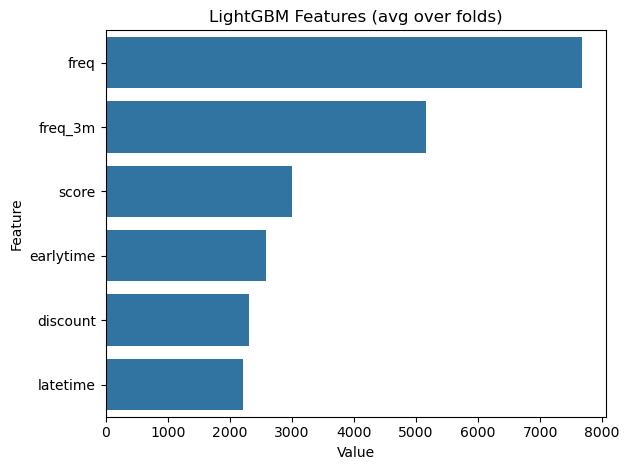

In [314]:
# other way seaborn for importance levels
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()